In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# **Objective** 

The research project focuses on predicting the length of hospital stays (LOS) for patients, aiming to optimize treatment plans and resource allocation. By developing a model surpassing industry standards like median and average LOS, the project seeks to enhance patient care, control costs, and increase efficiency in healthcare services. Accurate LOS prediction is crucial for healthcare management, influencing resource allocation, patient care planning, and cost-effectiveness. The goal is to create a reliable predictive model for hospital LOS, beneficial for widespread adoption across healthcare institutions.

Here we use the public dataset made available at https://health.data.ny.gov/Health/Hospital-Inpatient-Discharges-SPARCS-De-Identified/tg3i-cinn by the Dept of Health of New York state.

Link to the Tableau Dashboard for Exploring the Dataset:
* **[Link to dashbaord](https://public.tableau.com/app/profile/bhautik.a.mangukiya/viz/Los/Dashboard1?publish=yes)**

# **References**

* Dataset:https://health.data.ny.gov/Health/Hospital-Inpatient-Discharges-SPARCS-De-Identified/tg3i-cinn
* Kaggle Notebook: https://www.kaggle.com/code/mihirjhaveri/inpatient-analysis-and-predicating-length-of-stay/notebook
* Research Papers on LOS:
  * https://journals.plos.org/digitalhealth/article?id=10.1371/journal.pdig.0000017#sec018 (Research Paper Reviews from the field of Prediction of Length of Stay.)
  * https://towardsdatascience.com/predicting-hospital-length-of-stay-at-time-of-admission-55dfdfe69598
  * https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-021-01722-4 ( Logistic regression models have been used to predict discharge. Cubist models have shown LOS prediction results and tree-based models have presented improved performance and interpretability. Most clinical data in electronic health records (EHRs) are offered in unstructured text form such as physician-patient history narratives.)
  * https://www.frontiersin.org/articles/10.3389/frai.2023.1179226/full (All techniques based on machine learning and Classification and regression)
  * https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9448550/ (Used Lasso regression (LR), ridge regression (RR), random forest regression (RFR), light gradient boosting machine (LightGBM), and extreme gradient boosting regression (XGBR) and six feature encoding methods named label encoding, count encoding, one-hot encoding, target encoding, leave-one-out encoding, and the proposed encoding method)




In [3]:
#load dataset and print the head
los_df = pd.read_csv('/kaggle/input/hospital-inpatient-discharges-dataset/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2021_20231012.csv')
los_df.tail()

/tmp/ipykernel_33/1704501323.py:2: DtypeWarning: Columns (10,29) have mixed types. Specify dtype option on import or set low_memory=False.
  los_df = pd.read_csv('/kaggle/input/hospital-inpatient-discharges-dataset/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2021_20231012.csv')


,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
2101583,Finger Lakes,Steuben,5001000.0,866.0,Corning Hospital,18 to 29,OOS,F,White,Not Span/Hispanic,...,Minor,Minor,Medical,Private Health Insurance,NaN,NaN,NaN,N,"6,296.75","4,197.53"
2101584,Hudson Valley,Westchester,5902001.0,1045.0,White Plains Hospital Center,50 to 69,125,M,Multi-racial,Unknown,...,Major,Major,Medical,Medicaid,NaN,NaN,NaN,Y,"122,882.04","37,761.67"
2101585,New York City,Manhattan,7002054.0,1464.0,New York-Presbyterian Hospital - Columbia Pres...,30 to 49,109,M,White,Not Span/Hispanic,...,Moderate,Minor,Surgical,Private Health Insurance,NaN,NaN,NaN,N,"291,358.19","117,144.76"
2101586,New York City,Kings,7001045.0,1692.0,Woodhull Medical & Mental Health Center,50 to 69,112,F,Other Race,Spanish/Hispanic,...,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,Y,"27,830.75","18,969.13"
2101587,Central NY,Oneida,3201002.0,589.0,"Rome Memorial Hospital, Inc",70 or Older,133,F,White,Not Span/Hispanic,...,Major,Moderate,Medical,Medicare,NaN,NaN,NaN,Y,"33,850.5","12,546.53"


# **Data Description**

let's look at the some of the definitions of each of the column.

Dataset Discription :https://health.data.ny.gov/Health/Hospital-Inpatient-Discharges-SPARCS-De-Identified/tg3i-cinn

  **Operating Certificate Number** - assigned by NYS Department of Health to the hospital which must meet all safety, staffing, and operational requirements.


  **Permanent Facility Id** - a unique number assigned to each hospital or clinic by the Department.

  **Facility Name** is the hospital name.

  **Patient Disposition** is discharging back to their home, transferring to another hospital or skilled nursing facility, or being admitted to the hospital.

  **Race** refers to the concept of dividing people into groups on the basis of various sets of physical characteristics and the process of ascribing social meaning to those groups. Ethnicity describes the culture of people in a given geographic region, including their language, heritage, religion and customs.

  **CCSR Diagnosis Code:** The CCSR aggregates International Classification of Diseases, 10th Revision, Clinical Modification/Procedure Coding System (ICD-10-CM/PCS) codes into clinically meaningful categories.

  **All Patients Refined Diagnosis Related Groups (APR DRG)** is a classification system that classifies patients according to their reason of admission, severity of illness and risk of mortality.

  The **Major Diagnostic Categories (MDC)** are formed by dividing all possible principal diagnoses (from ICD-9) into 25 mutually exclusive diagnosis areas.

  The **severity of illness and risk of mortality** subclasses have levels of 1 to 4, indicating minor, moderate, major, and extreme, respectively.

  **APR Medical Surgical Description** classification of Medical, Surgical or Not Applicable.

  **Total charges for the discharge.** billed to the patients.

  **Total estimated cost for the discharge.** cost incurred to the hospital in service.

# **Data Wrangling**

In [4]:
#lets check the info about the dataset
los_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2101588 entries, 0 to 2101587
Data columns (total 33 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Hospital Service Area                object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Permanent Facility Id                float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCSR Diagnosis Code                  object 
 15  CCSR Diagnosis Description      

dataset is the size of 21,01,588 rows and the 33 columns.
Most of the Datatype is object. let's check th database and clean it.

In [5]:
#change the datatype of Length of Stay
los_df["Length of Stay"] = los_df["Length of Stay"].replace('120 +', 120)
los_df["Length of Stay"] = pd.to_numeric(los_df["Length of Stay"])

Data Wrangling Next, let's check for the presence of null values in our table and deal with them appropriately. Here, I find that some columns have a few null values, which can be dropped easily, while other columns have large number of null values. For these columns, I simply drop them as they do not provide much information.

In [4]:
#check the na available in each of the column
los_df.isna().sum()

Hospital Service Area                    10642
Hospital County                          10642
Operating Certificate Number             12091
Permanent Facility Id                    10642
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                      45062
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                          0
Discharge Year                               0
CCSR Diagnosis Code                       1634
CCSR Diagnosis Description                1634
CCSR Procedure Code                     576021
CCSR Procedure Description              576021
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code                                 0
APR MDC Descr

from the above data we should have to ignore the following columns because of high value of the nan in the columns.
Zip Code (we can use the facility id)
CCSR Procedure code and Description
Payment Typology 2 and 3

In [7]:
#print the total unique vlues in each of the columns.
for column in los_df.columns:
    unique_values = len(los_df[column].unique())
    print(f'No. of Unique values in {column}: {unique_values}')

No. of Unique values in Hospital Service Area: 9
No. of Unique values in Hospital County: 58
No. of Unique values in Operating Certificate Number: 169
No. of Unique values in Permanent Facility Id: 206
No. of Unique values in Facility Name: 205
No. of Unique values in Age Group: 5
No. of Unique values in Zip Code - 3 digits: 51
No. of Unique values in Gender: 3
No. of Unique values in Race: 4
No. of Unique values in Ethnicity: 4
No. of Unique values in Length of Stay: 120
No. of Unique values in Type of Admission: 6
No. of Unique values in Patient Disposition: 19
No. of Unique values in Discharge Year: 1
No. of Unique values in CCSR Diagnosis Code: 478
No. of Unique values in CCSR Diagnosis Description: 478
No. of Unique values in CCSR Procedure Code: 321
No. of Unique values in CCSR Procedure Description: 321
No. of Unique values in APR DRG Code: 334
No. of Unique values in APR DRG Description: 334
No. of Unique values in APR MDC Code: 26
No. of Unique values in APR MDC Description: 2

There are 63824 patient who are expired in the hospital during treatment. so just remove that records.

In [10]:
los_df['Payment Typology 1'].value_counts()

Payment Typology 1
Medicare                     826250
Medicaid                     646300
Private Health Insurance     307242
Blue Cross/Blue Shield       224090
Managed Care, Unspecified     28229
Self-Pay                      27107
Miscellaneous/Other           22526
Federal/State/Local/VA        18604
Department of Corrections      1240
Name: count, dtype: int64

In [9]:
los_df['Payment Typology 2'].value_counts()

Payment Typology 2
Medicaid                     416865
Medicare                     186541
Self-Pay                     160052
Private Health Insurance     137548
Blue Cross/Blue Shield       100462
Federal/State/Local/VA        12311
Miscellaneous/Other           11846
Managed Care, Unspecified      3614
Department of Corrections       104
Name: count, dtype: int64

In [8]:
los_df['Payment Typology 3'].value_counts()

Payment Typology 3
Self-Pay                     204828
Medicaid                      71499
Private Health Insurance      26405
Blue Cross/Blue Shield        12967
Medicare                      10811
Miscellaneous/Other            3297
Federal/State/Local/VA         2270
Managed Care, Unspecified       606
Department of Corrections        24
Name: count, dtype: int64

In [8]:
los_df = los_df[los_df['Patient Disposition'] != "Expired"]

In [9]:
#let's check why birth weight column has very high number of null values.
los_df["Birth Weight"] = los_df["Birth Weight"].replace("UNKN", np.nan)
los_df["Birth Weight"] = pd.to_numeric(los_df["Birth Weight"])
los_df[['Birth Weight','Age Group']].groupby('Age Group').mean()

,Birth Weight
Age Group,
0 to 17,3194.875275
18 to 29,NaN
30 to 49,NaN
50 to 69,NaN
70 or Older,NaN


Birth Weight is only available for the new born babies. we can use to predict for only new boarns analysis. so currently we can remove the birth weight columns from our analysis.

In [10]:
#getting quick insights from numeric columns
los_df.describe()

,Operating Certificate Number,Permanent Facility Id,Length of Stay,Discharge Year,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Birth Weight
count,2.025741e+06,2.027174e+06,2.037764e+06,2037764.0,2.037764e+06,2.037764e+06,2.037764e+06,206294.000000
mean,4.995912e+06,1.035352e+03,5.541649e+00,2021.0,4.143293e+02,1.027953e+01,2.074390e+00,3194.875275
std,2.232270e+06,7.107069e+02,8.042331e+00,0.0,2.424923e+02,5.921538e+00,9.238396e-01,577.473128
min,1.010000e+05,1.000000e+00,1.000000e+00,2021.0,1.000000e+00,0.000000e+00,0.000000e+00,400.000000
25%,2.951001e+06,5.280000e+02,2.000000e+00,2021.0,1.940000e+02,5.000000e+00,1.000000e+00,2900.000000
50%,5.902001e+06,1.046000e+03,3.000000e+00,2021.0,3.840000e+02,9.000000e+00,2.000000e+00,3200.000000
75%,7.002020e+06,1.453000e+03,6.000000e+00,2021.0,6.400000e+02,1.500000e+01,3.000000e+00,3600.000000
max,7.004010e+06,1.035500e+04,1.200000e+02,2021.0,9.560000e+02,2.500000e+01,4.000000e+00,9000.000000


# **Exploratory Data Analysis**
Let's Do some exploratory analysis for further understanding of the database.

/tmp/ipykernel_33/1154392656.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(los_df['Length of Stay'], kde=False);


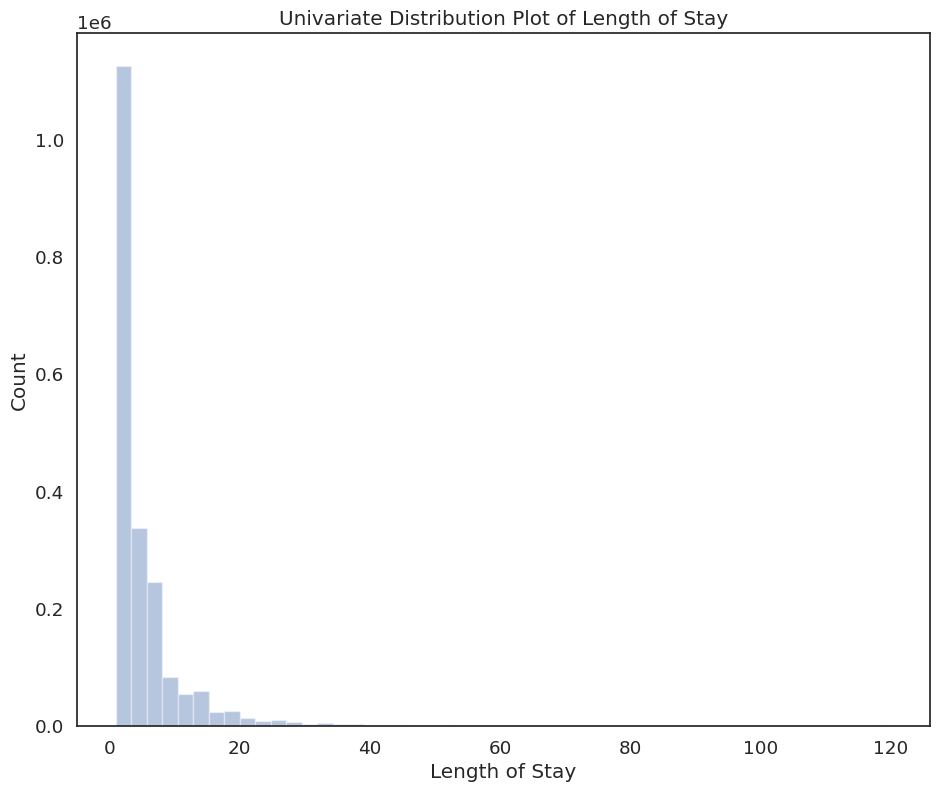

In [11]:
# check the distribution of the Length of stay variable
sns.set(font_scale=1.2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(11, 9))
sns.distplot(los_df['Length of Stay'], kde=False);
plt.ylabel('Count')
plt.title('Univariate Distribution Plot of Length of Stay')
plt.show()

Length of Saty variable is right skewed it has very low records for large days.
it causes the class imbalance problem for classification problem.

**W.r.t. Payment Topology:**

* **Medicare** is federal health insurance for anyone age 65 and older, and some people under 65 with certain disabilities or conditions.
* **Medicaid** is a joint federal and state program that gives health coverage to some people with limited income and resources.
* Nearly one in three Americans rely on **Blue Cross Blue Shield** companies for access to safe, quality, and affordable healthcare.
* The term **Managed Care** is used in the United States to describe a group of activities intended to reduce the cost of providing health care and providing American health insurance while improving the quality of that care ("managed care techniques").
* **Department of corrections** is the department of local government that is responsible for managing the treatment of convicted offenders.

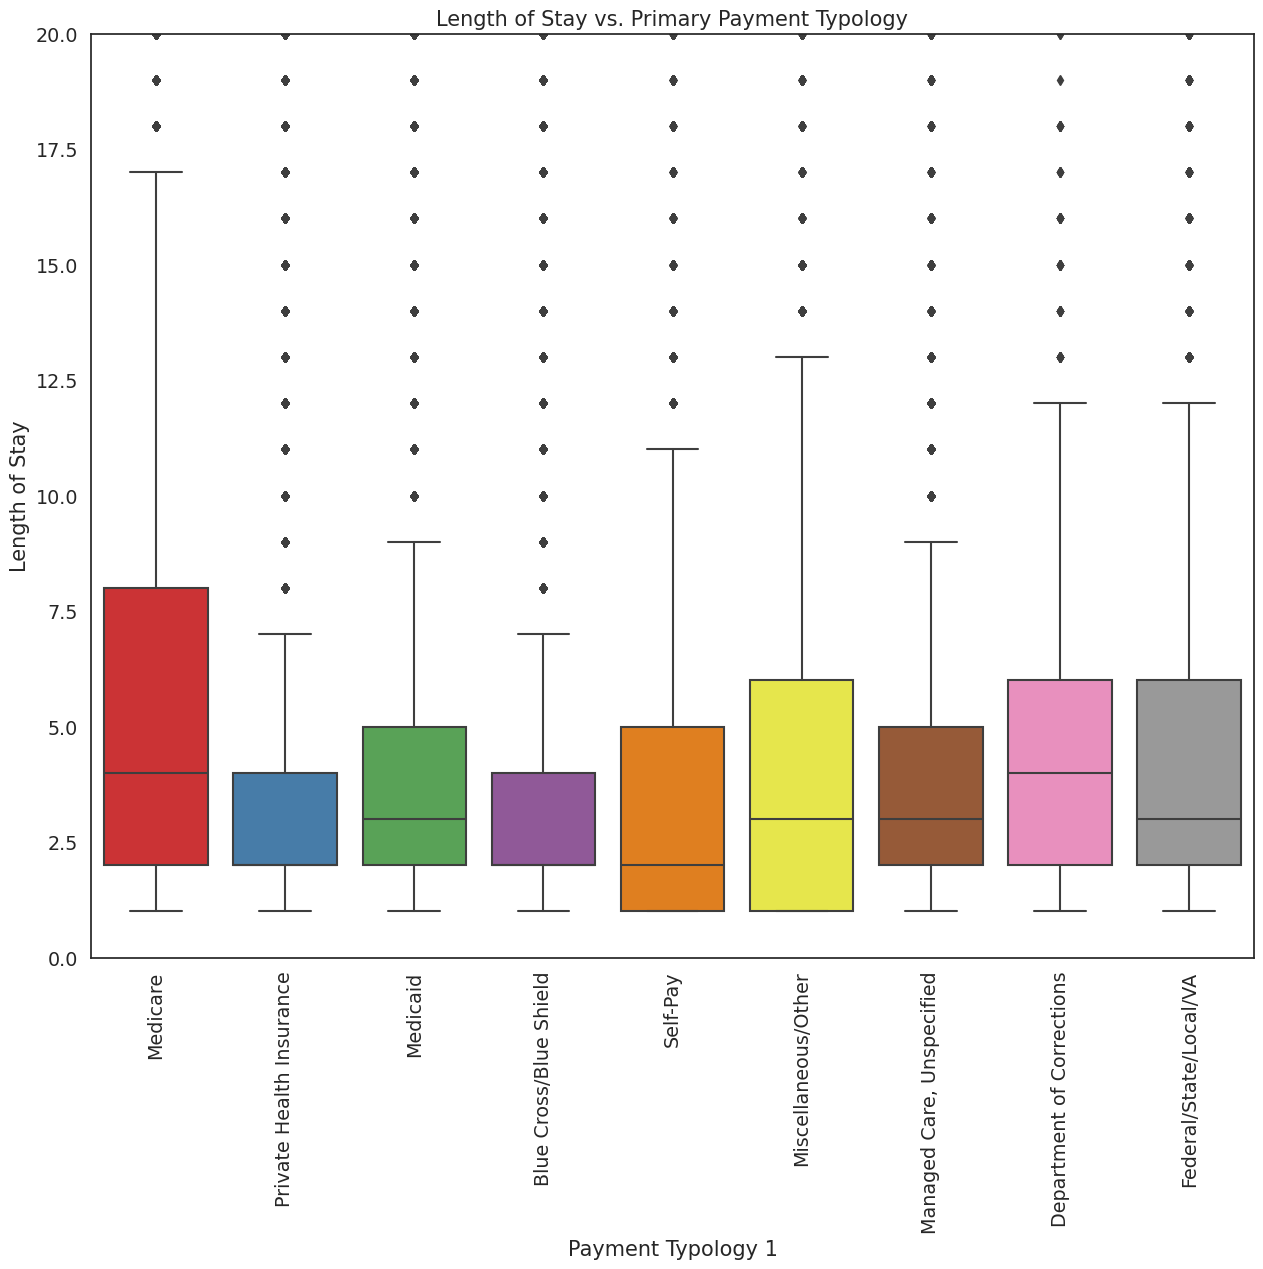

In [12]:
#let's check the distribution of the length of stay by payment typology
sns.set(font_scale=1.25)
sns.set_style("white")
f, ax = plt.subplots(figsize=(15, 12))
sns.boxplot(x="Payment Typology 1", y="Length of Stay", data=los_df, palette='Set1')
ax.set(ylim=(0, 20))
plt.xticks(rotation=90)
plt.title('Length of Stay vs. Primary Payment Typology')
plt.show()

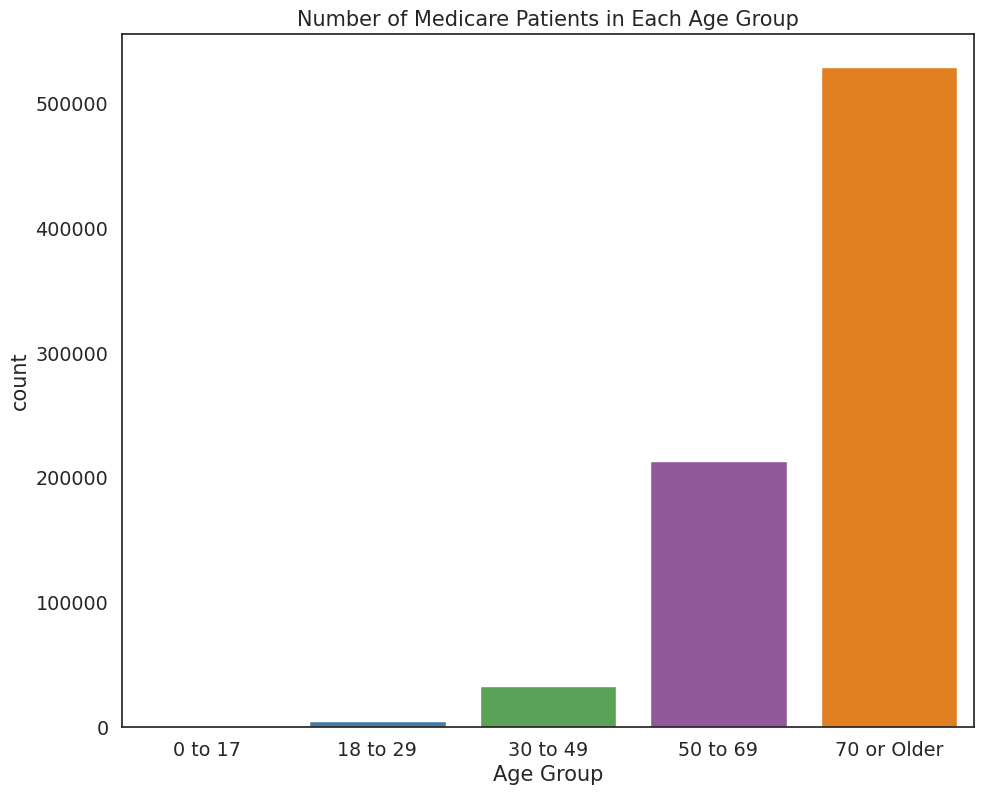

In [13]:
#Create a plot for number of medicare patients in each age group
f, ax = plt.subplots(figsize=(11, 9))
sns.countplot(x='Age Group', data = los_df[los_df['Payment Typology 1']=='Medicare'], order=['0 to 17','18 to 29','30 to 49','50 to 69','70 or Older'], palette='Set1')
plt.title('Number of Medicare Patients in Each Age Group')
plt.show()

Medicare patients have the longest length of stay. This can be because of having more medicare patients are in the old age group.

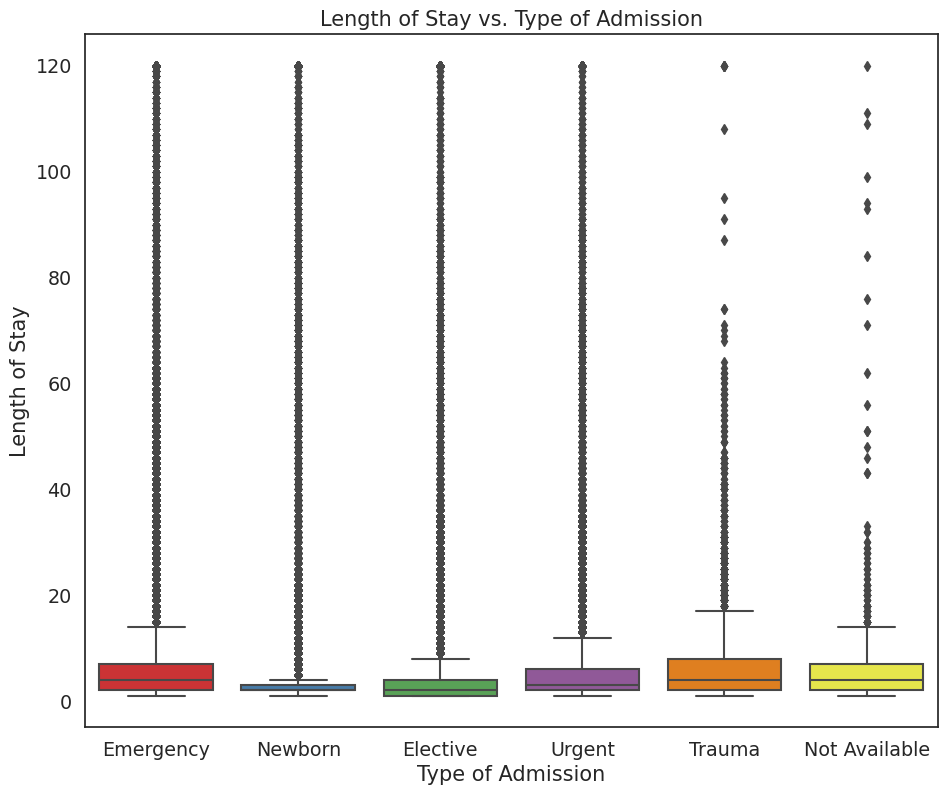

In [14]:
#distribution of Type of admission and length of stay
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x='Type of Admission', y = "Length of Stay" , data = los_df, palette='Set1')
plt.title('Length of Stay vs. Type of Admission')
plt.show()

we can say that if admission type is trauma then patients spent more time.

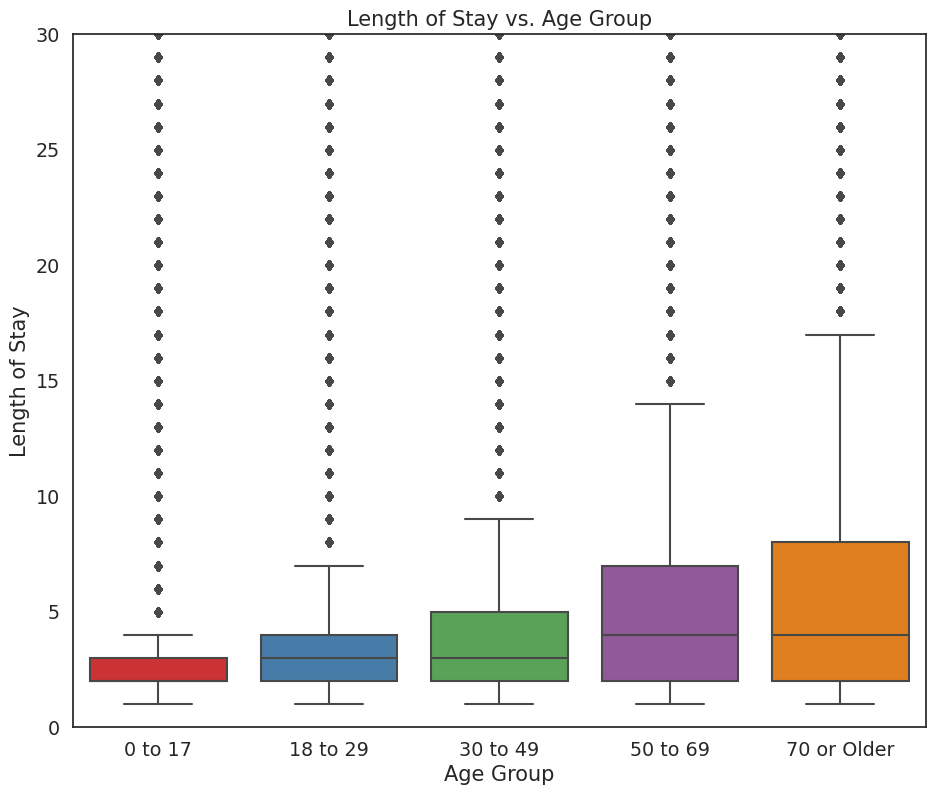

In [15]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Age Group", y="Length of Stay", order=['0 to 17','18 to 29','30 to 49','50 to 69','70 or Older'],
            palette="Set1", data=los_df)
ax.set(ylim=(0, 30))
plt.title('Length of Stay vs. Age Group')
plt.show()

Here, we can see some significant variance in length of stay across different age groups. It is evident that age groups 50-69 and 70 or older tend to have the longest stay distributions

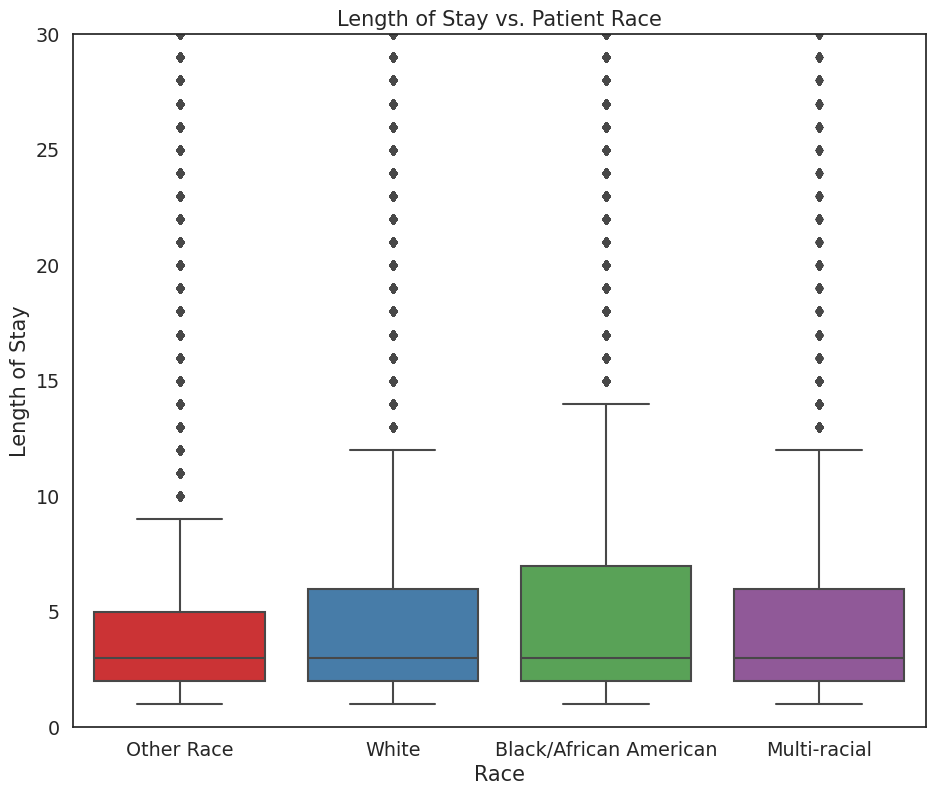

In [16]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Race", y="Length of Stay", data=los_df, palette='Set1')
plt.title('Length of Stay vs. Patient Race')
ax.set(ylim=(0, 30))
plt.show()

Next, let's take a look at how length of stay varies across different hospital service areas. Area wise distribution can be shown by Hospital country but as it has 57 unique value, Hospital service area is considered which has only 9 unique values.

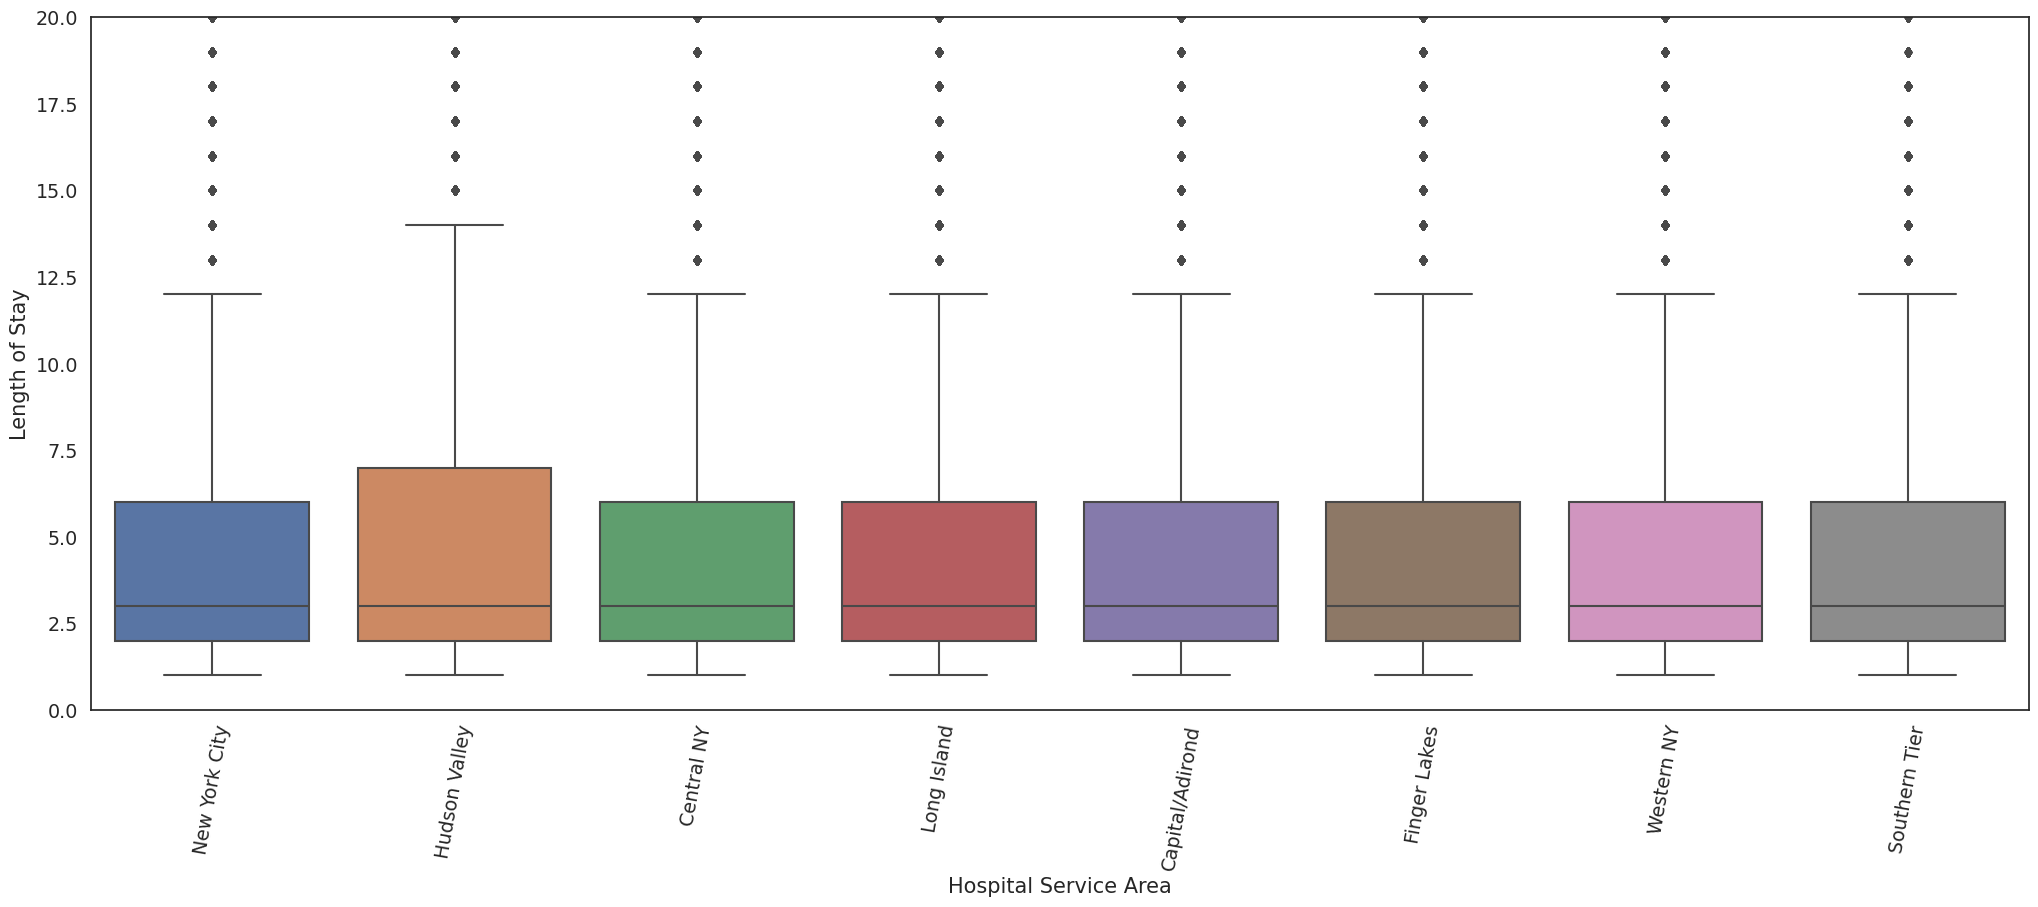

In [17]:
f, ax = plt.subplots(figsize=(25, 9))
sns.boxplot(x="Hospital Service Area", y="Length of Stay", data=los_df)
ax.set(ylim=(0, 20))
plt.xticks(rotation=80)
plt.show()

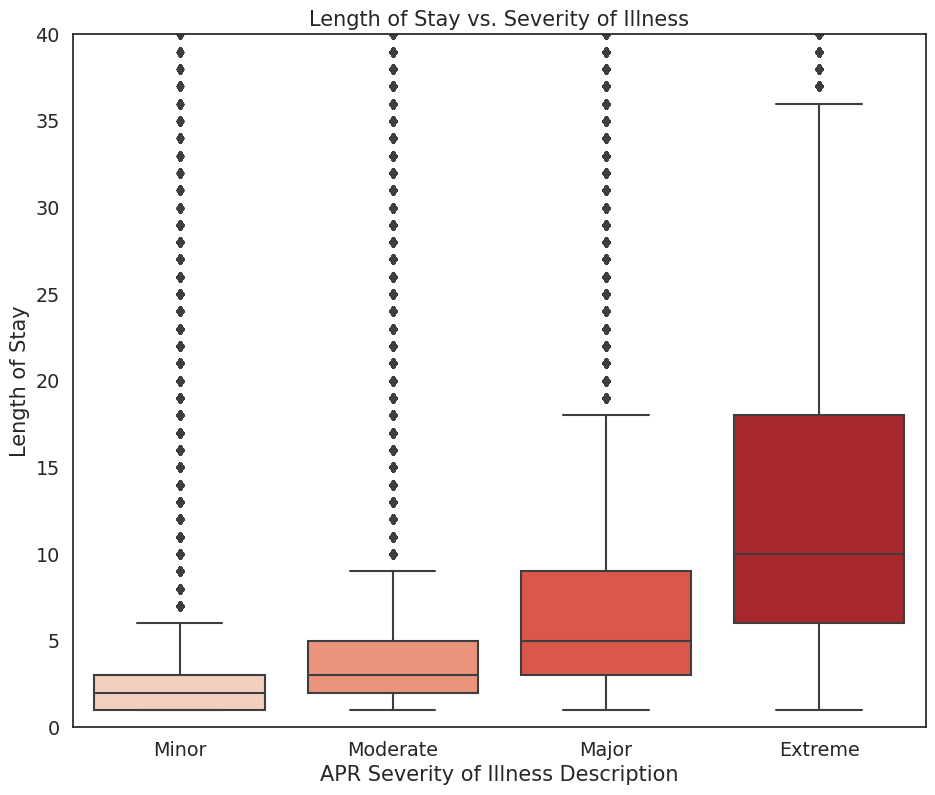

In [18]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="APR Severity of Illness Description", y="Length of Stay",
            order=['Minor', 'Moderate', 'Major', 'Extreme'], data=los_df, palette='Reds')
ax.set(ylim=(0, 40))
plt.title('Length of Stay vs. Severity of Illness')
plt.show()

As the severity of illness increases, length of stay also increases.

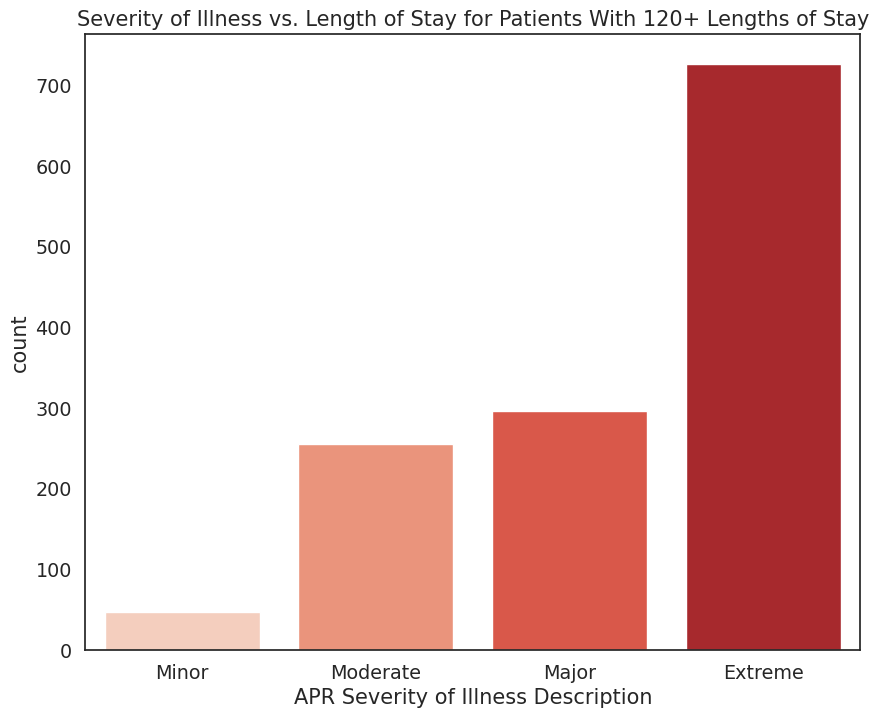

In [19]:
f, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x='APR Severity of Illness Description', data = los_df[los_df['Length of Stay']==120],
              order=['Minor', 'Moderate', 'Major', 'Extreme'], palette='Reds')
plt.title('Severity of Illness vs. Length of Stay for Patients With 120+ Lengths of Stay')
plt.show()

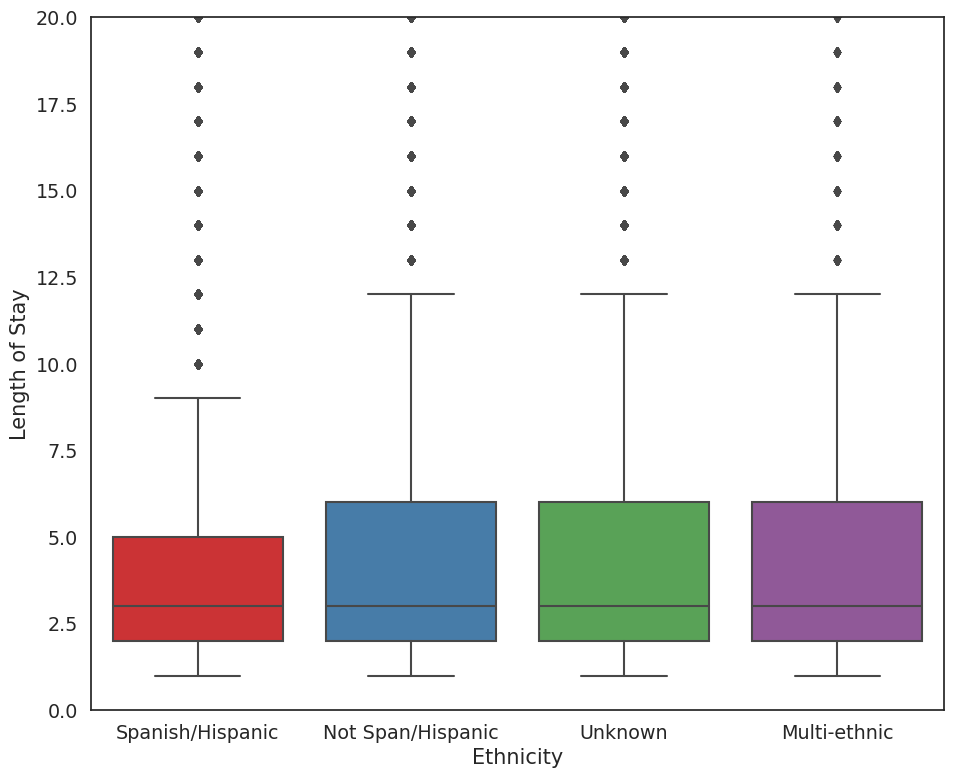

In [20]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Ethnicity", y="Length of Stay",
            data=los_df , palette='Set1')
ax.set(ylim=(0, 20))
plt.show()

In [21]:
los_df.columns

Index(['Hospital Service Area', 'Hospital County',
       'Operating Certificate Number', 'Permanent Facility Id',
       'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'Discharge Year', 'CCSR Diagnosis Code',
       'CCSR Diagnosis Description', 'CCSR Procedure Code',
       'CCSR Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Payment Typology 2', 'Payment Typology 3', 'Birth Weight',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

We now proceed to fit the model but before that we have to drop the following columns:

*   **Hospital Service Area & Hospital County & Zip Code - 3 Digits & Facility Name** ( We use Permanent Facility ID column to see the area wise breakdown)
*   **Operating Certificate Number** (It doesn't show any information about patient)
*   **Patient Disposition, Total Charges and Total Costs** (This information is not available at the time of admission and we try to predict the Length of Stay at the time of admission)
*  **Discharge Year** (Data is for 2021 year so it shows no variablility)
*  **CCSR Procedure Description, APR DRG Description, APR MDC Description, APR Severity of Illness Description** (This Columns are basically description of code so we use code as encode the values in categorical variable)
*  **Payment Typology 2 & 3** (This columns has very large amount of null values so we use Payment Typology to describe how patients will pay the bill)
*  **Birth Weight** (As we show above Birth Weight is available only for new born babies so we have to drop this column for overall analysis)


In [22]:
los_df = los_df.drop(['Hospital Service Area','Hospital County','Operating Certificate Number', "Facility Name", "Zip Code - 3 digits","Patient Disposition","Discharge Year","CCSR Diagnosis Description","CCSR Procedure Description", "APR DRG Description","APR MDC Description","APR Severity of Illness Description","Payment Typology 2", "Payment Typology 3","Birth Weight" ,"Total Charges", "Total Costs"], axis = 1)

In [23]:
los_df.head()

,Permanent Facility Id,Age Group,Gender,Race,Ethnicity,Length of Stay,Type of Admission,CCSR Diagnosis Code,CCSR Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator
0,1169.0,70 or Older,M,Other Race,Spanish/Hispanic,27,Emergency,INF012,OTR004,137,4,3,Extreme,Medical,Medicare,Y
1,1169.0,50 to 69,F,White,Not Span/Hispanic,4,Emergency,NVS005,NaN,43,1,2,Minor,Medical,Private Health Insurance,Y
2,1168.0,18 to 29,F,Other Race,Spanish/Hispanic,2,Emergency,PRG016,PGN003,540,14,1,Minor,Surgical,Medicaid,N
3,3058.0,70 or Older,M,Other Race,Spanish/Hispanic,5,Emergency,GEN004,ADM017,463,11,3,Major,Medical,Medicare,Y
4,1169.0,50 to 69,F,Black/African American,Not Span/Hispanic,3,Emergency,NVS008,CNS002,58,1,2,Minor,Medical,Medicare,Y


#  **Feature Encoding**
We use OrdinalEncoder to Encode the categorical variable in numerical variable.
there are 2 reasons why we use this.


1.   If we use one hot encoding then there are very large number of the culumns are created.
2.   We will basically use the random forest or decision tree methods to predict the Length of Stay so it don't affected by Ordinal Encoding.



In [24]:
#create manual encoding for some variable
age_group_index = {'0 to 17':1,'18 to 29':2,'30 to 49':3,'50 to 69':4,'70 or Older':5}
gender_index = {'U':0,'F':1,'M':2}
risk_and_severity_index = {np.nan:0,'Minor': 1, 'Moderate': 2, 'Major': 3, 'Extreme': 4}

In [25]:
#apply encoding to the Age Group, Gnder, APR Risk of Mortality and APR Severity of illness index
los_df['Age Group'] = los_df['Age Group'].apply(lambda x: age_group_index[x])
los_df['Gender'] = los_df['Gender'].apply(lambda x : gender_index[x])
los_df['APR Risk of Mortality'] = los_df['APR Risk of Mortality'].apply(lambda x : risk_and_severity_index[x])

In [26]:
from sklearn.preprocessing import OrdinalEncoder
from numpy import asarray
encoder = OrdinalEncoder()
los_df['Race'] = encoder.fit_transform(asarray(los_df['Race']).reshape(-1,1))
los_df['Ethnicity'] = encoder.fit_transform(asarray(los_df["Ethnicity"]).reshape(-1,1))
los_df["Type of Admission"] = encoder.fit_transform(asarray(los_df["Type of Admission"]).reshape(-1,1))
los_df["CCSR Diagnosis Code"] =encoder.fit_transform(asarray(los_df["CCSR Diagnosis Code"]).reshape(-1,1))
los_df["CCSR Procedure Code"] = encoder.fit_transform(asarray(los_df["CCSR Procedure Code"]).reshape(-1,1))
los_df["APR Medical Surgical Description"] = encoder.fit_transform(asarray(los_df["APR Medical Surgical Description"]).reshape(-1,1))
los_df["Payment Typology 1"] = encoder.fit_transform(asarray(los_df["Payment Typology 1"]).reshape(-1,1))
los_df["Emergency Department Indicator"] = encoder.fit_transform(asarray(los_df["Emergency Department Indicator"]).reshape(-1,1))

Let's look at the encoded df.

In [27]:
los_df.head()

,Permanent Facility Id,Age Group,Gender,Race,Ethnicity,Length of Stay,Type of Admission,CCSR Diagnosis Code,CCSR Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator
0,1169.0,5,2,2.0,2.0,27,1.0,154.0,253.0,137,4,3,4,0.0,5.0,1.0
1,1169.0,4,1,3.0,1.0,4,1.0,377.0,NaN,43,1,2,1,0.0,7.0,1.0
2,1168.0,2,1,2.0,2.0,2,1.0,423.0,257.0,540,14,1,1,2.0,4.0,0.0
3,3058.0,5,2,2.0,2.0,5,1.0,121.0,16.0,463,11,3,3,0.0,5.0,1.0
4,1169.0,4,1,0.0,1.0,3,1.0,380.0,52.0,58,1,2,1,0.0,5.0,1.0


In [28]:
los_df.isna().sum()

Permanent Facility Id                10590
Age Group                                0
Gender                                   0
Race                                     0
Ethnicity                                0
Length of Stay                           0
Type of Admission                        0
CCSR Diagnosis Code                   1614
CCSR Procedure Code                 566234
APR DRG Code                             0
APR MDC Code                             0
APR Severity of Illness Code             0
APR Risk of Mortality                    0
APR Medical Surgical Description         0
Payment Typology 1                       0
Emergency Department Indicator           0
dtype: int64

We have 3 columns in which null values are present.
As CCSR Diagnosis Code and Permanant Facility ID has very low number of null values we can remove that records.
As CCSR Procedure Code has very high number of null values we have to remove that column from further analysis.

In [29]:
los_df = los_df.drop("CCSR Procedure Code",axis=1)
los_df = los_df.dropna(subset=['CCSR Diagnosis Code',"Permanent Facility Id"])

In [30]:
encoded_df = los_df

In [31]:
x = encoded_df.drop(["Length of Stay"],axis = 1 )
y = encoded_df["Length of Stay"]

In [32]:
#split the dataset in training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size= 0.8,random_state=9)

# **Decision Tree and Random Forest Regressor**
We try to fit the decision tree regressor to predict the los,.

In [33]:
#fit decision tree regressor and check the output with the help of r2 and mse.
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)
train_predictions = dtree.predict(X_train)
test_predictions = dtree.predict(X_test)
print("r2 train: ",metrics.r2_score(y_train,train_predictions))
print("r2 test: ",metrics.r2_score(y_test,test_predictions))
print("mean squared error train: ", mean_squared_error(y_train,train_predictions))
print("mean squared error train: ",mean_squared_error(y_test,test_predictions))

r2 train:  0.873319615906822
r2 test:  0.03357598879250201
mean squared error train:  8.196403685012678
mean squared error train:  62.967449819042834


After running hyperparameter tuning on the decision tree with the parameter list:
* "criterion":["squared_error","friedman_mse","poisson"],
* "max_depth" : [None,5,10],
* "min_samples_leaf":[1,5,10],
* "min_weight_fraction_leaf":[0,0.5,0.9],
* "max_features":[None,"log2","sqrt"],
* "max_leaf_nodes":[None,10,50,90,150],

we found the best combination to be:
* 'criterion': 'poisson',
* 'max_depth': 10,
* 'max_features': None,
* 'max_leaf_nodes': None,
* 'min_samples_leaf': 10,
* 'min_weight_fraction_leaf': 0.

Now, we will run the decision tree with these parameters.

In [34]:
#fit decision tree regressor and check the output with the help of r2 and mse.
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(criterion='poisson',max_depth = 10,max_features = None,  max_leaf_nodes = None, min_samples_leaf= 10,min_weight_fraction_leaf = 0)
dtree.fit(X_train,y_train)
train_predictions = dtree.predict(X_train)
test_predictions = dtree.predict(X_test)
print("r2 train: ",metrics.r2_score(y_train,train_predictions))
print("r2 test: ",metrics.r2_score(y_test,test_predictions))
print("mean squared error train: ", mean_squared_error(y_train,train_predictions))
print("mean squared error train: ",mean_squared_error(y_test,test_predictions))

r2 train:  0.4250186337890497
r2 test:  0.4163246460166613
mean squared error train:  37.20212424804963
mean squared error train:  38.02942407922739


let's try to run the Random Forest Regressor to predict LOS with more generalized prediction.

In [35]:
#let fit the random forest regressor on the model
from sklearn.ensemble import RandomForestRegressor
r_f_regressor = RandomForestRegressor(random_state=2921,
                                      criterion= 'squared_error',
                                      n_estimators= 200,
                                      max_features='sqrt',
                                      max_samples=0.5,
                                      max_depth=20,
                                      min_samples_split=100,
                                      max_leaf_nodes=100)

r_f_regressor.fit(X_train,y_train)
train_predictions = r_f_regressor.predict(X_train)
test_predictions = r_f_regressor.predict(X_test)
print("r2 train: ",metrics.r2_score(y_train,train_predictions))
print("r2 test: ",metrics.r2_score(y_test,test_predictions))
print("mean squared error train: ", mean_squared_error(y_train,train_predictions))
print("mean squared error train: ",mean_squared_error(y_test,test_predictions))

r2 train:  0.36779766206855946
r2 test:  0.36817468018022426
mean squared error train:  40.90440370376127
mean squared error train:  41.16663975519791


# **Lable/Predictor Creation**
It does not increase the accuracy of prediction so now on we try to predict the Length of Stay as Categorical Variable.
So, the problem become categorical by nature and it is predicted with categorical variables.
First let create a bins of different size according to number of records in each bin.

In [36]:
#create the bins and cut the dataframe in to different size
bins = [0,5,10,20,30,50,120]
labels = [5,10,20,30,50,120]
encoded_df['los_bin']= pd.cut(x = encoded_df['Length of Stay'], bins= bins)
encoded_df['los_lable']= pd.cut(x = encoded_df['Length of Stay'], bins= bins, labels=labels)
encoded_df['los_bin'] = encoded_df['los_bin'].apply(lambda x: str(x).replace(',',' -'))
encoded_df['los_bin'] = encoded_df['los_bin'].apply(lambda x: str(x).replace('120','120+'))

In [37]:
#take a look at the new df
encoded_df.head

<bound method NDFrame.head of          Permanent Facility Id  Age Group  Gender  Race  Ethnicity  \
0                       1169.0          5       2   2.0        2.0   
1                       1169.0          4       1   3.0        1.0   
2                       1168.0          2       1   2.0        2.0   
3                       3058.0          5       2   2.0        2.0   
4                       1169.0          4       1   0.0        1.0   
...                        ...        ...     ...   ...        ...   
2101583                  866.0          2       1   3.0        1.0   
2101584                 1045.0          4       2   1.0        3.0   
2101585                 1464.0          3       2   3.0        1.0   
2101586                 1692.0          4       1   2.0        2.0   
2101587                  589.0          5       1   3.0        1.0   

         Length of Stay  Type of Admission  CCSR Diagnosis Code  APR DRG Code  \
0                    27                1.0      

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


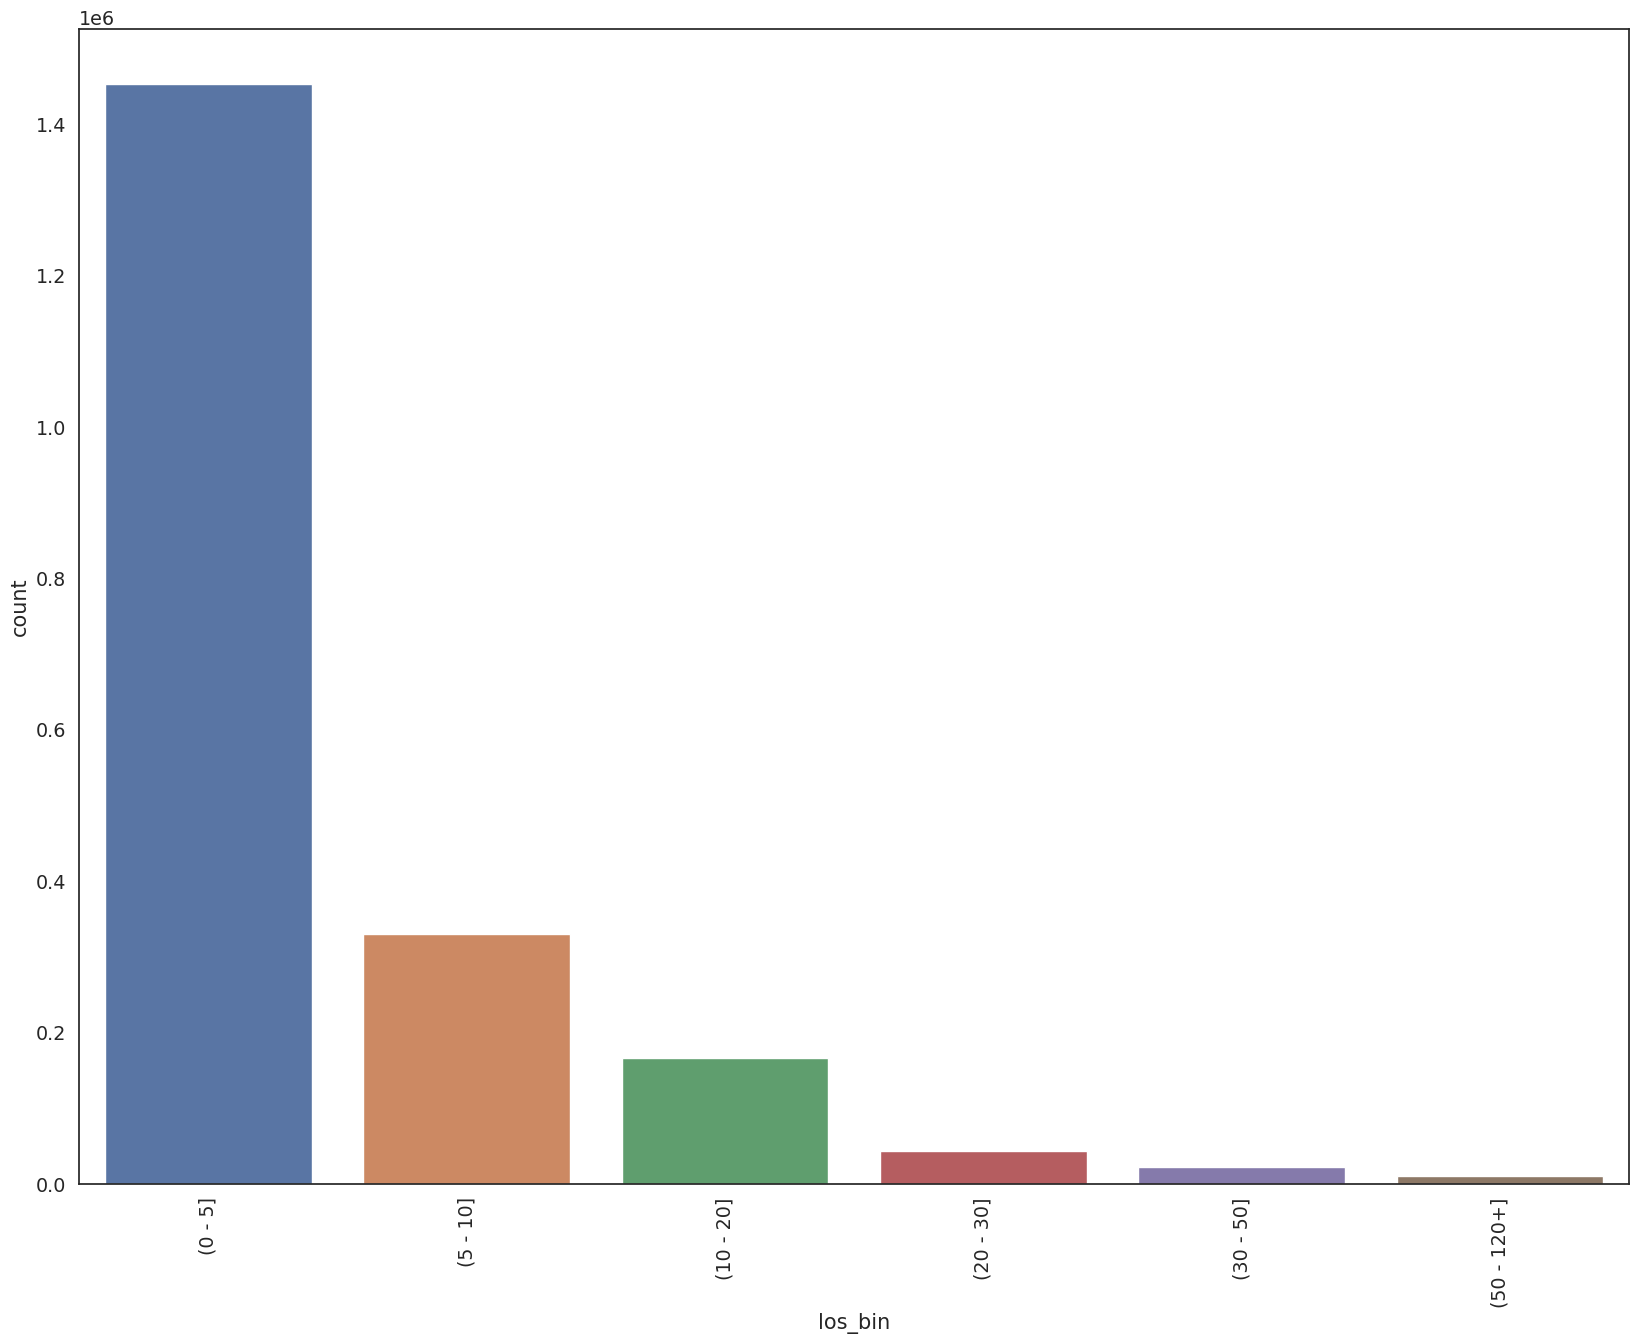

In [38]:
#let's visulize the data according to bin
f, ax = plt.subplots(figsize=(20, 15))
sns.countplot(x='los_bin', data = encoded_df)
plt.xticks(rotation=90)
plt.show()

In [39]:
new_x = encoded_df.drop(['Length of Stay','los_bin','los_lable'],axis=1)
new_y = encoded_df['los_lable']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.2)

Now we Fit the Following Classification technique to predict the lable of predictor.
1. Decision Tree Classifier
2. Random Forest Classifier
3. AdaBoost Classifier
4. Gradient Boosting Classifier
5. Logistic Regression
6. KNeighbors Classifier
7. Gaussian Naive Bayes

In [41]:
#lets fit the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

from sklearn import metrics
train_predictions = dtree.predict(X_train)
test_predictions = dtree.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions))

Train Accuracy: 0.9242118397902807
Test Accuracy: 0.6849101361842251
              precision    recall  f1-score   support

           5       0.83      0.86      0.84    290725
          10       0.30      0.28      0.29     66213
          20       0.26      0.24      0.25     33054
          30       0.16      0.13      0.15      8667
          50       0.15      0.13      0.14      4274
         120       0.28      0.23      0.25      2180

    accuracy                           0.68    405113
   macro avg       0.33      0.31      0.32    405113
weighted avg       0.67      0.68      0.68    405113



In [42]:
#let's do hyper parameter tuning to reduce overfitting or find on which level it performs well
dtree_parameters= {"max_depth" : [None,5,10,15,20,25]}
tuning_model=GridSearchCV(dtree,param_grid=dtree_parameters,scoring='accuracy',cv=3,verbose=3)
tuning_model.fit(X_train,y_train)
print(tuning_model.best_score_)
print(tuning_model.best_params_)
print(tuning_model.best_estimator_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ....................max_depth=None;, score=0.680 total time=   9.1s
[CV 2/3] END ....................max_depth=None;, score=0.680 total time=   9.1s
[CV 3/3] END ....................max_depth=None;, score=0.679 total time=   9.2s
[CV 1/3] END .......................max_depth=5;, score=0.730 total time=   3.1s
[CV 2/3] END .......................max_depth=5;, score=0.731 total time=   3.2s
[CV 3/3] END .......................max_depth=5;, score=0.730 total time=   3.2s
[CV 1/3] END ......................max_depth=10;, score=0.740 total time=   5.3s
[CV 2/3] END ......................max_depth=10;, score=0.741 total time=   5.4s
[CV 3/3] END ......................max_depth=10;, score=0.740 total time=   5.5s
[CV 1/3] END ......................max_depth=15;, score=0.738 total time=   6.9s
[CV 2/3] END ......................max_depth=15;, score=0.738 total time=   7.0s
[CV 3/3] END ......................max_depth=15;,

In [43]:
#lets optimise the parameters to reduce overfitting
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state = 42, max_depth = 10)
dtree.fit(X_train,y_train)

from sklearn import metrics
train_predictions = dtree.predict(X_train)
test_predictions = dtree.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions))

Train Accuracy: 0.7416935161877773
Test Accuracy: 0.7405365910252201
              precision    recall  f1-score   support

           5       0.80      0.96      0.87    290725
          10       0.36      0.18      0.24     66213
          20       0.38      0.20      0.26     33054
          30       0.52      0.05      0.09      8667
          50       0.34      0.05      0.09      4274
         120       0.52      0.26      0.35      2180

    accuracy                           0.74    405113
   macro avg       0.49      0.29      0.32    405113
weighted avg       0.68      0.74      0.69    405113



In [44]:
#fit the random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150, max_depth=15)
rf.fit(X_train,y_train)

train_predictions = rf.predict(X_train)
test_predictions = rf.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions))

Train Accuracy: 0.7605746795182329
Test Accuracy: 0.7431654871603726
              precision    recall  f1-score   support

           5       0.80      0.97      0.87    290725
          10       0.38      0.17      0.23     66213
          20       0.38      0.23      0.29     33054
          30       0.49      0.05      0.09      8667
          50       0.39      0.06      0.10      4274
         120       0.54      0.26      0.35      2180

    accuracy                           0.74    405113
   macro avg       0.49      0.29      0.32    405113
weighted avg       0.68      0.74      0.69    405113



In [45]:
#fit the random forest classifier with less depth so it uses more generel case without overfitting
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150, max_depth=10)
rf.fit(X_train,y_train)

train_predictions = rf.predict(X_train)
test_predictions = rf.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions))

Train Accuracy: 0.7381284592992938
Test Accuracy: 0.7373029253566289
              precision    recall  f1-score   support

           5       0.78      0.98      0.87    290725
          10       0.36      0.13      0.19     66213
          20       0.38      0.16      0.23     33054
          30       0.57      0.03      0.05      8667
          50       0.40      0.03      0.05      4274
         120       0.50      0.24      0.33      2180

    accuracy                           0.74    405113
   macro avg       0.50      0.26      0.29    405113
weighted avg       0.67      0.74      0.68    405113



In [46]:
# Check the most important feature in the model.
feature_importance = rf.feature_importances_

# Sort feature importance in descending order
sorted_idx = feature_importance.argsort()[::-1]

# Print the most important features
print("Most important features:")
for i in sorted_idx:
    print(f"Feature {X_train.columns[i]}: Importance {feature_importance[i]}")

Most important features:
Feature APR Severity of Illness Code: Importance 0.286496245930753
Feature APR Risk of Mortality: Importance 0.17507109630825707
Feature APR DRG Code: Importance 0.16477600233444678
Feature APR MDC Code: Importance 0.11933362982390155
Feature CCSR Diagnosis Code: Importance 0.10041943163871589
Feature Age Group: Importance 0.04973078999328648
Feature APR Medical Surgical Description: Importance 0.03649386573427124
Feature Type of Admission: Importance 0.023612489260936252
Feature Emergency Department Indicator: Importance 0.02076211484979378
Feature Payment Typology 1: Importance 0.008985909604634449
Feature Permanent Facility Id: Importance 0.008808744069156207
Feature Race: Importance 0.002549648424485022
Feature Gender: Importance 0.0017892182279671547
Feature Ethnicity: Importance 0.0011708137993952804


**We can say All Patients Refined Diagnosis codes are the best predictors of LOS.**

In [47]:
#Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtree = DecisionTreeClassifier(random_state = 1, class_weight = "balanced", max_depth = 15)
boost = AdaBoostClassifier(dtree, n_estimators=75, random_state=0)
boost.fit(X_train, y_train)

train_predictions = boost.predict(X_train)
test_predictions = boost.predict(X_test)
print("Train Accuracy:", accuracy_score(y_train, train_predictions))
print("Test Accuracy:", accuracy_score(y_test, test_predictions))
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions))

Train Accuracy: 0.7913185897012622
Test Accuracy: 0.6834389417273699
              precision    recall  f1-score   support

           5       0.85      0.84      0.84    290725
          10       0.31      0.33      0.32     66213
          20       0.28      0.27      0.28     33054
          30       0.16      0.18      0.17      8667
          50       0.13      0.14      0.14      4274
         120       0.25      0.29      0.27      2180

    accuracy                           0.68    405113
   macro avg       0.33      0.34      0.34    405113
weighted avg       0.69      0.68      0.69    405113



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

from sklearn import metrics
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions))

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)


from sklearn import metrics
train_predictions = logistic_regression.predict(X_train)
test_predictions = logistic_regression.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)


from sklearn import metrics
train_predictions = knn_classifier.predict(X_train)
test_predictions = knn_classifier.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions))

In [ ]:
knn_classifier = KNeighborsClassifier()
Knn_parameters= {"n_neighbors" : [10,15,20,25]}
tuning_model=GridSearchCV(knn_classifier,param_grid=Knn_parameters,scoring='accuracy',cv=3,verbose=3)
tuning_model.fit(X_train,y_train)
print(tuning_model.best_score_)
print(tuning_model.best_params_)
print(tuning_model.best_estimator_)

In [ ]:
#let's run the code with n_neighbors = 25 

from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 25)
knn_classifier.fit(X_train, y_train)


from sklearn import metrics
train_predictions = knn_classifier.predict(X_train)
test_predictions = knn_classifier.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions))

In [ ]:
#let's run the code with n_neighbors = 30 

from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 30)
knn_classifier.fit(X_train, y_train)


from sklearn import metrics
train_predictions = knn_classifier.predict(X_train)
test_predictions = knn_classifier.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions))

In [ ]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)


from sklearn import metrics
train_predictions = naive_bayes_classifier.predict(X_train)
test_predictions = naive_bayes_classifier.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions))

In [ ]:
# Feature Importance
feature_importance = rf.feature_importances_

# Sort feature importance in descending order
sorted_idx = feature_importance.argsort()[::-1]

# Print the most important features
print("Most important features:")
for i in sorted_idx:
    print(f"Feature {i}: Importance {feature_importance[i]}")

At last we can predict the LOS with thej Highest accuracy with Random Forest Classifer with (n_estimatores = 150, and Max_depth = 15) 
* **Train Accuracy: 0.7604784100228887**
* **Test Accuracy: 0.7438862737063486**

Wich is greater than the reference paper.

# **Further Development**
Moving forward, an essential aspect of further development lies in addressing class imbalance within the dataset. The significant challenge posed by class imbalance, particularly for classes with minimal representation such as high LOS, inhibits the model's ability to accurately predict outcomes. By focusing on class balancing techniques, we aim to overcome this limitation and enhance the model's predictive performance. Addressing class imbalance will not only lead to more accurate predictions but also contribute to more effective treatment planning and resource allocation, ultimately improving patient care and operational efficiency in healthcare settings.

Thanks for reading, your suggessions and advices are greatly welcomed.